Adv ML - Assignment #1

Amelia Sayes

ams2638

## Importing data & initial setup

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

In [ ]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [ ]:
# Load data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [ ]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


# 1. Explore bivariate results (Use visualizations!)

Describe any relationships you see between particular features and the target variable



###Data Setup, Standardization and Sorting

In [ ]:
#creating dataframe for plots, standardized  data type
df = pd.concat([X_train, y_train_labels], axis = 1)
df.rename(columns = {0 : "Happiness"}, inplace = True)
df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,Average
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,High
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,Average
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,Very High
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,High


In [ ]:
#sort dataframe by happiness level to standardize distribution

#define the order
order = ["Very Low", "Low", "Average", "High", "Very High"]

#assign the order to the Happiness column and sort column
df["Happiness"] = pd.Categorical(df["Happiness"], categories = order)
df_sort = df.sort_values(by = "Happiness")

#print sorted df to check
df_sort

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness
20,Zimbabwe,0.366,1.114,0.433,0.361,0.151,0.089,Zimbabwe,Africa,Sub-Saharan Africa,1.000000,Very Low
46,Ethiopia,0.336,1.033,0.532,0.344,0.209,0.100,Ethiopia,Africa,Sub-Saharan Africa,21.000000,Very Low
51,Egypt,0.913,1.039,0.644,0.241,0.076,0.067,Egypt,Africa,Northern Africa,1101.000000,Very Low
53,Zambia,0.578,1.058,0.426,0.431,0.247,0.087,Zambia,Africa,Sub-Saharan Africa,1419.095238,Very Low
27,Congo (Kinshasa),0.094,1.125,0.357,0.269,0.212,0.053,Congo (Kinshasa),Africa,Sub-Saharan Africa,1419.095238,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
34,New Zealand,1.303,1.557,1.026,0.585,0.330,0.380,New Zealand,Oceania,Australia and New Zealand,57.333333,Very High
52,Sweden,1.387,1.487,1.009,0.574,0.267,0.373,Sweden,Europe,Northern Europe,12.000000,Very High
72,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe,Northern Europe,2.000000,Very High
55,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe,Northern Europe,1.000000,Very High


In [ ]:
df_sort.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks', 'Happiness'],
      dtype='object')

### Creating a function for graphs

In [ ]:
#Function to automate graphs

def plt_bar(x, y):
  import matplotlib.pyplot as plt
  plt.bar(x, y, data = df_sort)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(y)
  plt.show()


## Numeric Features Bivariate Visualizations

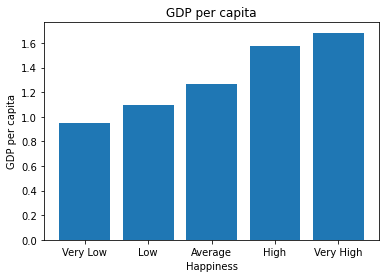

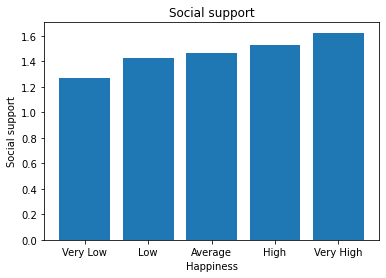

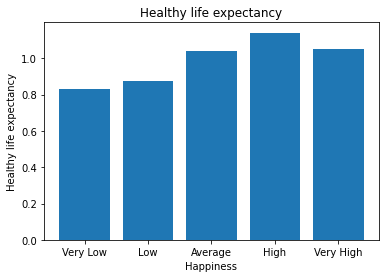

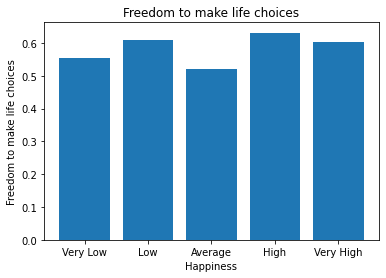

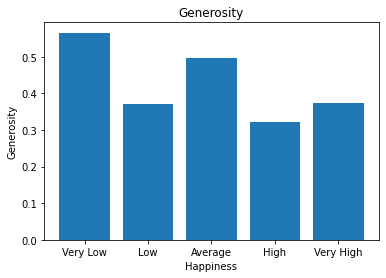

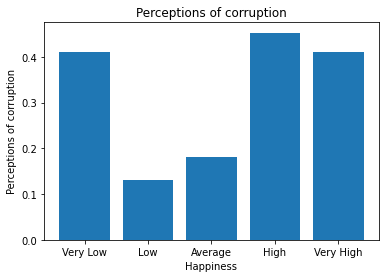

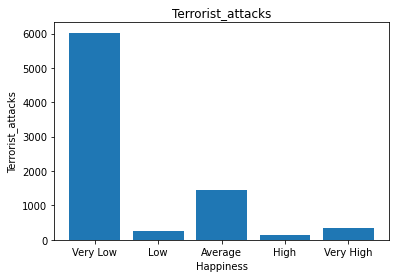

In [ ]:
#overall trends 

plt_bar("Happiness", "GDP per capita")
plt_bar("Happiness", "Social support")
plt_bar("Happiness", "Healthy life expectancy")
plt_bar("Happiness", "Freedom to make life choices")
plt_bar("Happiness", "Generosity")
plt_bar("Happiness", "Perceptions of corruption")
plt_bar("Happiness", "Terrorist_attacks")

Overall, GDP per capita, social support and healthy life expectancy are the features with the strongest positive trends for happiness scores. Terrorist attacks are only a strong indicator for "very low" happiness. 

The remaining numerical features are less informative. Freedom to make life choices is relatiely similar across happiness levels, and there is no major coherent trend for generosity. Perceptions of corruption are high for both "very low", "high", and "very high" countries. 


### More detailed explorations

#### GDP per capita by happiness

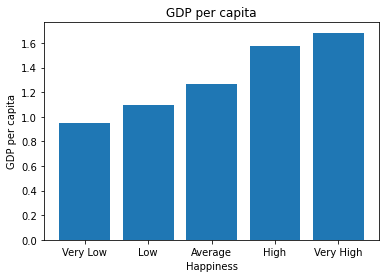

In [ ]:
plt_bar("Happiness", "GDP per capita")

Happiness increases as gdp per capita increases

#### Social Support by happiness

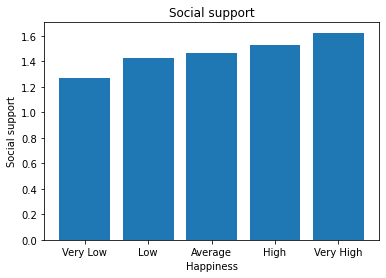

In [ ]:
plt_bar("Happiness", "Social support")

There's also a positive relationship between social support levels and happiness rating but this has a weaker positive relationship compared to GDP p/c and happiness

#### Healthy life expectancy by happiness

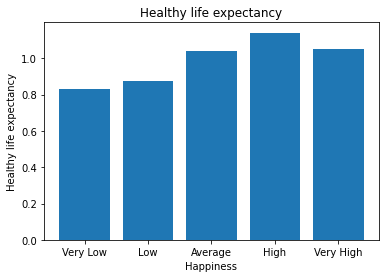

In [ ]:
plt_bar("Happiness", "Healthy life expectancy")

From happiness levels "very low" to "high", as happiness rating increases as does health life expectancy. However, coutnries with "very high" happiness ratings actually have slightly lower healthy life expectancies than those with "high" hapiness ratings, at a similar level to countries with a "average" life expectancy. 

Overall the differences in healthy life expectancies between coutnries with "average", "high" or "very high" happiness levels are relatively small.

#### Freedom to make life choices by happiness

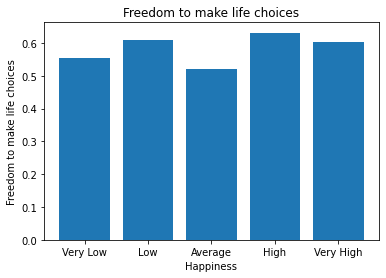

In [ ]:
plt_bar("Happiness", "Freedom to make life choices")

Freedom to make life choices are relatively similar across the happiness ratings

#### Generosity by happiness 

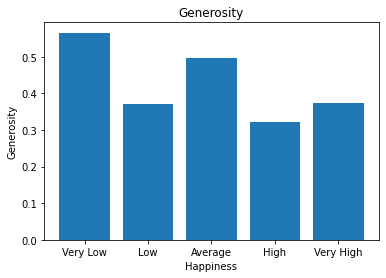

In [ ]:
plt_bar("Happiness", "Generosity")

Generosity levels are variable by happiness rating, with no overall trend. 

Coutnries with "very low" happiness have the highest generosity scores, followed by those with "average" happiness. 

Countries with "low", "high" and "very high" happiness ratings have rouhgly similar levels of generosity (around 0.4).


#### Perceptions of corruption by happiness

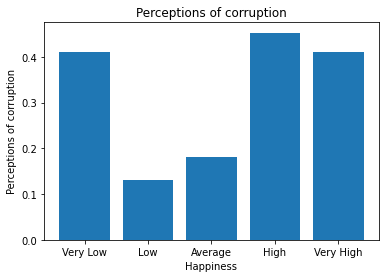

In [ ]:
plt_bar("Happiness", "Perceptions of corruption")

Corruption is high in both very low happiness coutnries and "high" and "very high" happiness countries. 

#### Terrorist attacks by happiness

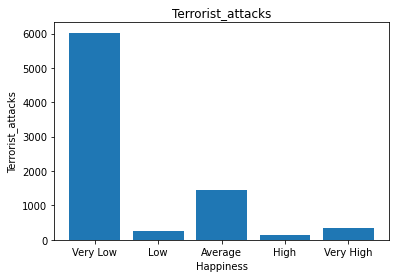

In [ ]:
plt_bar("Happiness", "Terrorist_attacks")

Countries with very low happiness have significantly more terrorist attacks than coutnries with higher levels of happiness. 

Coutnries with average happiness have some terrorist attacks.

# 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection

Explain any meaningful findings

## Data preprocessing and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor1.fit(X_train) 

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


### Extract columns names

In [ ]:
numerical_feature_names = numeric_features
print(numerical_feature_names)

print()

categorical_feature_names = preprocess.named_transformers_['cat'].named_steps['onehot'].get_feature_names()
print(categorical_feature_names)

['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']

['x0_Africa' 'x0_Americas' 'x0_Asia' 'x0_Europe' 'x0_Oceania'
 'x1_Australia and New Zealand' 'x1_Central Asia' 'x1_Eastern Asia'
 'x1_Eastern Europe' 'x1_Latin America and the Caribbean'
 'x1_Northern Africa' 'x1_Northern America' 'x1_Northern Europe'
 'x1_South-eastern Asia' 'x1_Southern Asia' 'x1_Southern Europe'
 'x1_Sub-Saharan Africa' 'x1_Western Asia' 'x1_Western Europe']


In [ ]:
cat_feat_names = categorical_feature_names.tolist()
print(cat_feat_names)

['x0_Africa', 'x0_Americas', 'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Australia and New Zealand', 'x1_Central Asia', 'x1_Eastern Asia', 'x1_Eastern Europe', 'x1_Latin America and the Caribbean', 'x1_Northern Africa', 'x1_Northern America', 'x1_Northern Europe', 'x1_South-eastern Asia', 'x1_Southern Asia', 'x1_Southern Europe', 'x1_Sub-Saharan Africa', 'x1_Western Asia', 'x1_Western Europe']


In [ ]:
print(type(numerical_feature_names))
print(type((categorical_feature_names)))
print(type(cat_feat_names))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
column_names = numerical_feature_names + cat_feat_names
print(column_names)

print()

col_names_array = np.array(column_names)
print(col_names_array)

['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks', 'x0_Africa', 'x0_Americas', 'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Australia and New Zealand', 'x1_Central Asia', 'x1_Eastern Asia', 'x1_Eastern Europe', 'x1_Latin America and the Caribbean', 'x1_Northern Africa', 'x1_Northern America', 'x1_Northern Europe', 'x1_South-eastern Asia', 'x1_Southern Asia', 'x1_Southern Europe', 'x1_Sub-Saharan Africa', 'x1_Western Asia', 'x1_Western Europe']

['GDP per capita' 'Social support' 'Healthy life expectancy'
 'Freedom to make life choices' 'Generosity' 'Perceptions of corruption'
 'Terrorist_attacks' 'x0_Africa' 'x0_Americas' 'x0_Asia' 'x0_Europe'
 'x0_Oceania' 'x1_Australia and New Zealand' 'x1_Central Asia'
 'x1_Eastern Asia' 'x1_Eastern Europe'
 'x1_Latin America and the Caribbean' 'x1_Northern Africa'
 'x1_Northern America' 'x1_Northern Europe' 'x1_South-eastern Asia'
 'x1_Southern

## Random Forest Classifer SFM method


### Extract Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#fit model
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
feat_select = rf.fit(preprocessor(X_train), y_train)

#get feature importances
feat_imp = feat_select.feature_importances_

print(feat_imp)
type(feat_imp)

[1.91629612e-01 1.26669527e-01 1.37009855e-01 1.00973051e-01
 9.56665895e-02 9.95768658e-02 9.02681755e-02 1.62905902e-02
 1.00577058e-02 1.25919151e-02 8.32145592e-03 3.96182244e-06
 1.20963285e-03 4.55008602e-03 3.32227227e-03 5.53925496e-03
 1.18988323e-02 4.33766008e-03 7.34330457e-04 2.18888036e-03
 7.36674370e-03 1.57122416e-02 1.04329835e-02 3.06484519e-02
 6.46441240e-03 6.53491354e-03]


numpy.ndarray

### SelectFromModel Threshold Method

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#insantiate SFM with median as the threshold criteria
select = SelectFromModel(rf, threshold = "median")

#fit model on data
select.fit(preprocessor(X_train), y_train_labels)

#generate new X_train data
X_train_new = select.transform(preprocessor(X_train))

X_test_new = select.transform(preprocessor(X_test))

In [ ]:
#return boolean mask for features selected
rf_mask = select.get_support()
print(rf_mask)

[ True  True  True  True  True  True  True  True False  True False False
 False False False False  True False False False False  True  True  True
 False False]


### Comparing importances

In [ ]:
#check type of data and shapes for compatibility
print(type(rf_mask))
print(type(feat_imp))
print(type(col_names_array))
print(col_names_array.shape)
print(rf_mask.shape)
print(feat_imp.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(26,)
(26,)
(26,)


In [ ]:
#creat dfs
imp_df = pd.DataFrame(index = col_names_array, data = feat_imp, columns = ["Feature Importance Score"])
bool_df = pd.DataFrame(index = col_names_array, data = rf_mask, columns = ["Boolean Mask"])
feature_importances_rf = pd.concat([bool_df, imp_df], axis =1)
print(feature_importances_rf)

                                    Boolean Mask  Feature Importance Score
GDP per capita                              True                  0.191630
Social support                              True                  0.126670
Healthy life expectancy                     True                  0.137010
Freedom to make life choices                True                  0.100973
Generosity                                  True                  0.095667
Perceptions of corruption                   True                  0.099577
Terrorist_attacks                           True                  0.090268
x0_Africa                                   True                  0.016291
x0_Americas                                False                  0.010058
x0_Asia                                     True                  0.012592
x0_Europe                                  False                  0.008321
x0_Oceania                                 False                  0.000004
x1_Australia and New Zeal

In [ ]:
#sorted feature importances df
print(feature_importances_rf.sort_values("Feature Importance Score", ascending = False))

                                    Boolean Mask  Feature Importance Score
GDP per capita                              True                  0.191630
Healthy life expectancy                     True                  0.137010
Social support                              True                  0.126670
Freedom to make life choices                True                  0.100973
Perceptions of corruption                   True                  0.099577
Generosity                                  True                  0.095667
Terrorist_attacks                           True                  0.090268
x1_Sub-Saharan Africa                       True                  0.030648
x0_Africa                                   True                  0.016291
x1_Southern Asia                            True                  0.015712
x0_Asia                                     True                  0.012592
x1_Latin America and the Caribbean          True                  0.011899
x1_Southern Europe       

All of the numeric features have been selected using SFM with median as the selection criteria (i.e. they're above the median importance score). The importance scores of the numeric variables are between 0.09 to 0.19 - a large difference. The most important numeric features are GDP per capita, healthy life expectancy and social support - these are also the three numeric variables with the strongest visual trend when graphing the bivariate relationship. The numeric variables that have weaker importances are generosity and terrorist attacks. However, all numeric features rank above the categorical features. 

Only a few of the one hot encoded categorical variables have a feature importance above the median. Of the one hot encoded categorical variables, whether a country is in the Sub-Sharan Africa, Africa, Southern Asian, Asia, Latin America / Caribbean and Southern Europe, are above the median. Their feature importance ranges between 0.016 and 0.01, which are small values. Whether a country is in the other regions / continents does not provide meaningful value to whether a country has high or low happiness. In particular, Oceania, North America, Asutralia and NZ and Northern Europe are not important features and should be considered to be removed to optimize model performance.

# 3. Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models). 
submit three models to the model share leaderboard before you start communicating with your team.

### Checking category balance

In [ ]:
#check balance of data
df_sort["Happiness"].value_counts().sort_index()

Very Low     18
Low          16
Average      17
High         22
Very High    15
Name: Happiness, dtype: int64

Relatively balanced. Will need to use stratified k fold for cross validation when testing. 

## Model Type 1 - SVC

###Using Default Preprocessed Data - Model #702

In [ ]:
from sklearn.svm import SVC

svc_grid2 = { 'C' : np.arange(1, 3, 0.1), 'gamma' : np.arange(0.01, 0.2, 0.02)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
svc_model = GridSearchCV(SVC(kernel = 'rbf'), param_grid = svc_grid2, cv = skfold)
svc_model.fit(preprocessor(X_train), y_train_labels)

#metrics
print(f'Best Parameters :  {svc_model.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'C': 2.200000000000001, 'gamma': 0.10999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.886


Kfold score is 0.706 and tuned train set score is 0.886 which is high but does not necessarily indicate overfitting.

C value is relatively low at 2.2 and gamma is low at 0.1. This should limit overfitting and produce a more simple model.

#### - Submit Model #702

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(svc_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("svc_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = svc_model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "svc_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 702

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Using SFM X_train data - Model #703

In [ ]:
### X_new data
from sklearn.svm import SVC

svc_grid3 = { 'C' : np.arange(0.1, 2, 0.1), 'gamma' : np.arange(0.01, 0.1, 0.01)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
svc_model_xnew = GridSearchCV(SVC(kernel = 'rbf'), param_grid = svc_grid3, cv = skfold)
svc_model_xnew.fit(X_train_new, y_train_labels)

#metrics
print(f'Best Parameters :  {svc_model_xnew.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model_xnew.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model_xnew.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'C': 0.8, 'gamma': 0.06999999999999999}
Best Stratified Kfold Score : 0.671
Tuned Train Set Score : 0.784


Using SFM X_train data has reduced the stratified kfold score as well as tuned train set score. This is a weaker model than 702 as it is not generalizing as well onto new data nor is it learning enough from the train set data. 

This model has a smaller C value and gamma than #702.

#### Submit model - #703

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(svc_model_xnew, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("svc_model_xnew", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = svc_model_xnew.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "svc_model_xnew",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 703

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### SVC Comparison

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([702, 703])])

     version  accuracy  f1_score  precision    recall model_type
177      702  0.500000  0.499394   0.569487  0.512857        SVC
423      703  0.441176  0.419076   0.515833  0.478571        SVC


Model 702 has higher accuracy at 0.5 and higher f1 score at 0.499 - confirm that this is the better model at generalizing onto new data. Default x_train preprocessed data renders better results.

## Model 2 - Random Forest Classifier

### Using default preprocesor data - Model #701

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', bootstrap = True, random_state = 30).fit(preprocessor(X_train), y_train_labels)

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 37)

from sklearn.model_selection import GridSearchCV
rf_grid = {'n_estimators' : np.arange(1, 11, 2), 'max_features' : np.arange(1, 11, 2), 'max_depth' : np.arange(1, 11, 2)}

rf_model = (GridSearchCV(rf, param_grid = rf_grid, cv = skfold))
rf_model.fit(preprocessor(X_train), y_train_labels)

#metrics
print(f'Best Parameters :  {rf_model.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'max_depth': 7, 'max_features': 3, 'n_estimators': 7}
Best Mean Stratified KFold Score : 0.658
Tuned Train Set Score : 0.909


Weaker kfold score relative to SVC method. High tuned train set score with evidence of overfitting. 

#### Submit to leaderboard - Model #701

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("rf_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = rf_model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "rf_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 701

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Further tuning - Model #708

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', bootstrap = True).fit(preprocessor(X_train), y_train_labels)

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 37)

from sklearn.model_selection import GridSearchCV
rf_grid1 = {'n_estimators' : np.arange(5, 85, 20), 'max_features' : np.arange(1, 11, 2), 'max_depth' : np.arange(1, 11, 2)}

rf_model1 = (GridSearchCV(rf, param_grid = rf_grid, cv = skfold))
rf_model1.fit(preprocessor(X_train), y_train_labels)

#metrics
print(f'Best Parameters :  {rf_model1.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model1.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model1.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'max_depth': 9, 'max_features': 3, 'n_estimators': 65}
Best Mean Stratified KFold Score : 0.707
Tuned Train Set Score : 1.0


Further tuning to allow higher number of estimators has increased overfitting and kfold score. Unlikely that this model generalizes well onto new data, submit to leaderboard and compare f-1 score with pervious mode #701 to confirm. 

#### Submit to leaderboard #708

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf_model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("rf_model1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = rf_model1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "rf_model1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 708

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Using Automatic Feature Selection X data - SFM from Random Forest - Model #709

In [ ]:
# New x data v1
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', bootstrap = True).fit(X_train_new, y_train_labels)

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 37)

from sklearn.model_selection import GridSearchCV
rf_grid_newx = {'n_estimators' : np.arange(1, 11, 2), 'max_features' : np.arange(1, 11, 2), 'min_samples_leaf' : np.arange(1, 10, 2)}

rf_model_newx = (GridSearchCV(rf, param_grid = rf_grid_newx, cv = skfold))
rf_model_newx.fit(X_train_new, y_train_labels)

#metrics
print(f'Best Parameters :  {rf_model_newx.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model_newx.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model_newx.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 5}
Best Mean Stratified KFold Score : 0.668
Tuned Train Set Score : 0.92


Vs. #701, using automatic feature selection data has minorly improved kfold score but also slightly increased train set score to 0.92. Overfitting even more than #701. Submit to leaderboard to assess trade off between improved kfold score and train set score overfitting.

#### Submit to leaderboard

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf_model_newx, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("rf_model_newx.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = rf_model_newx.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "rf_model_newx.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 709

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### X_train_new, further parameter tuning - Model #710

In [ ]:
#Further parameter tuning

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', bootstrap = True).fit(X_train_new, y_train_labels)

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 37)

from sklearn.model_selection import GridSearchCV
rf_grid_newx1 = {'n_estimators' : np.arange(8, 11, 1), 'max_features' : np.arange(1, 5, 1), 'min_samples_leaf' : np.arange(1, 5, 1)}

rf_model_newx1 = (GridSearchCV(rf, param_grid = rf_grid_newx1, cv = skfold))
rf_model_newx1.fit(X_train_new, y_train_labels)

#metrics
print(f'Best Parameters :  {rf_model_newx1.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model_newx1.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model_newx1.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 10}
Best Mean Stratified KFold Score : 0.682
Tuned Train Set Score : 0.943


Higher kfold score than model #701 and #709 but overfitting on the train set data. Will not generalize well on test data. Submit to leaderboard to confirm w/ f1 score.

#### Submit to leaderboard

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf_model_newx1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("rf_model_newx1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = rf_model_newx1.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "rf_model_newx1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 710

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Compare RF performance on test set

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([701, 708, 709, 710])])

     version  accuracy  f1_score  precision    recall              model_type
55       701  0.500000  0.495086   0.633333  0.509286  RandomForestClassifier
200      710  0.470588  0.442344   0.642857  0.484286  RandomForestClassifier
396      708  0.411765  0.394726   0.595238  0.415714  RandomForestClassifier
543      709  0.352941  0.344706   0.577778  0.358571  RandomForestClassifier


As suspected, of the random forest models, #701 is the strongest across, accuracy, and f-1 score. This is the model with default preprocessing standard and a lower number of estimators - overall a relatively simple model.

## Model 3 - Logistic Regression

### Default preprocessed X data - Model #780

In [ ]:
from sklearn.linear_model import LogisticRegression

log_grid = {'C' : np.arange(0.1, 2, 0.1), 'penalty' : ("none", "l1", "l2", "elasticnet"), 'solver' : ('liblinear', 'lbfgs', 'saga')}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
log_model = GridSearchCV(LogisticRegression(max_iter = 10000), param_grid = log_grid, cv = skfold)
log_model.fit(preprocessor(X_train), y_train_labels)

In [ ]:
#metrics 
print(f'Best Parameters :  {log_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.647
Tuned Train Set Score : 0.807


Best is l2 penalty with C value of 0.5 and lbfgs solver. Not overfitting, but kfold isn't very high meaning it isn't generalizing well.

#### Submit to leaderboard to assess - #780

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(log_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("log_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = log_model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "log_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 780

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Using SFM X_train data - Model #720

In [ ]:
from sklearn.linear_model import LogisticRegression

log_grid = {'C' : np.arange(0.1, 2, 0.1), 'penalty' : ("none", "l1", "l2", "elasticnet"), 'solver' : ('liblinear', 'lbfgs', 'saga')}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
log_model_newx = GridSearchCV(LogisticRegression(max_iter = 10000), param_grid = log_grid, cv = skfold)
log_model_newx.fit(X_train_new, y_train_labels)

In [ ]:
#metrics
print(f'Best Parameters :  {log_model_newx.best_params_}')
print(f'Best Stratified Kfold Score : {log_model_newx.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model_newx.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'C': 1.7000000000000002, 'penalty': 'l2', 'solver': 'liblinear'}
Best Stratified Kfold Score : 0.658
Tuned Train Set Score : 0.773


Using the SFM X_train data has produced a higher kfold score but with a lower tuned train set score. This model is likely not learning enough from the train set data to generalize well onto unseen data.

Vs. #780 this model is also l2 but uses liblinear solver instead of lbfgs. It has a higher C value.

#### Submit to leaderboard - #720

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(log_model_newx, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("log_model_newx.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = log_model_newx.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "log_model_newx.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 720

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Compare logreg models on test set

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([720, 780])])

     version  accuracy  f1_score  precision    recall          model_type
435      780  0.441176  0.427312   0.523810  0.467143  LogisticRegression
635      720  0.411765  0.386390   0.485281  0.427143  LogisticRegression


Model #780 performs better across all metrics, has learnt more from the train set data and is able to generalize better.

## Compare Best Peformer for Each Model

In [ ]:
print("Random Forest Classifer Model w default X_train data - Model #701")
print(f'Best Parameters :  {rf_model.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model.score(preprocessor(X_train), y_train_labels).round(3)}')


print()
print()


print("Logistic Regression w/ default X_train data - Model 780")
print(f'Best Parameters :  {log_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model.score(preprocessor(X_train), y_train_labels).round(3)}')

print()
print()

print("SVC with default X_train data - Model #702")
print(f'Best Parameters :  {svc_model.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Random Forest Classifer Model w default X_train data - Model #701
Best Parameters :  {'max_depth': 7, 'max_features': 3, 'n_estimators': 7}
Best Mean Stratified KFold Score : 0.658
Tuned Train Set Score : 0.909


Logistic Regression w/ default X_train data - Model 780
Best Parameters :  {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.647
Tuned Train Set Score : 0.807


SVC with default X_train data - Model #702
Best Parameters :  {'C': 2.200000000000001, 'gamma': 0.10999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.886


From k-fold score anmd training sets SVC model #702 seems to be the strongest performing model. This model has a C value of 2.2 which is relatively low and a relatively low gamma value. The stratified kfold score is the highest of all the models, and the tuned train set score does not show evidence of too much overfitting.

Random forest has the next highest kfold score at 0.658, but this is not much higher than logsitic regression. This is a simple mode, with only 7 estimators, a max_depth of 7 and max features of 3. The tuned train set score indicates the model might be overfitting which will reduce generalization. 

l2 Logsitic Regression is the weakest model. The stratified kfold score is only 0.637 and the train set score is relatively low at 0.807. It may not be learning enough from the train data.

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([701, 780, 702])])

     version  accuracy  f1_score  precision    recall              model_type
59       701  0.500000  0.495086   0.633333  0.509286  RandomForestClassifier
200      702  0.500000  0.499394   0.569487  0.512857                     SVC
435      780  0.441176  0.427312   0.523810  0.467143      LogisticRegression


Consistent with the deductions from k-fold cross validation, SVC is the strongest model, with the highest accuracyt and f-1 score. 

Interestingly, despite having a significantly lower kfold score, the random forest model is not far behind SVC in terms of performance on the test set. It has a similar accuracy and f-1 score to SVC. Precision is actually higher than SVC but it falls behind in recall.

Logistic Regression is a weaker model by some margin, with a f1 score of only 0.44 and a f1 score of 0.43. 

# 4. Fit and submit up to three more models after learning from your team.
Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.


After discussing with my team, I decided to use class_weights = balanced for SVC and Logistic Regression to see if this would improve my models. I also decided to try Gradient Boosting Classsifier instead of Random Forest Classisifer as some of my team members had better performance with this model.

## Model 1 - Gradient Boosting Trees

### Default X_train data - #736

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param = {"n_estimators" : np.arange(1, 100, 20), 'max_depth' : np.arange(1, 5, 1), 'learning_rate' : np.arange(0.1, 1, 0.1)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

gb = GridSearchCV(GradientBoostingClassifier(random_state = 30), param_grid = gb_param, cv=skfold)
gb.fit(preprocessor(X_train), y_train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=60, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=30),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 1, 21, 41, 61, 81])})

In [ ]:
#metrics
print(f'Best Parameters :  {gb.best_params_}')
print(f'Best Stratified Kfold Score : {gb.best_score_.round(3)}')
print(f'Tuned Train Set Score : {gb.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'learning_rate': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 81}
Best Stratified Kfold Score : 0.651
Tuned Train Set Score : 1.0


Overfitting on train data, with score 1.0
Relatively low kfold score.

#### Submit to leaderboard - Model #736



In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gb, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gb.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = gb.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gb.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 736

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Gradient Boosting Classifier w/ x-train_new data - model #760

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param = {"n_estimators" : np.arange(1, 100, 20), 'max_depth' : np.arange(1, 5, 1), 'learning_rate' : np.arange(0.1, 1, 0.1)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

gb_newx = GridSearchCV(GradientBoostingClassifier(random_state = 30), param_grid = gb_param, cv=skfold)
gb_newx.fit(X_train_new, y_train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=60, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=30),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 1, 21, 41, 61, 81])})

In [ ]:
#metrics
print(f'Best Parameters :  {gb_newx.best_params_}')
print(f'Best Stratified Kfold Score : {gb_newx.best_score_.round(3)}')
print(f'Tuned Train Set Score : {gb_newx.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 41}
Best Stratified Kfold Score : 0.628
Tuned Train Set Score : 0.898


Not overfitting on training data as much but kfold score is lower than with default preprocessed data. Need to compare f-1 score with previous model to see which generalizes better.

#### Submit to leaderboard - Model #760

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gb_newx, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gb_newx.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = gb_newx.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gb_newx.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 760

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Further tuning for SFM X_Train data - Model #752

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param = {"n_estimators" : np.arange(35, 50, 5), 'max_depth' : np.arange(1, 5, 1), 'learning_rate' : np.arange(0.1, 1, 0.1)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

gb_newx1 = GridSearchCV(GradientBoostingClassifier(random_state = 30), param_grid = gb_param, cv=skfold)
gb_newx1.fit(X_train_new, y_train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=60, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=30),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([35, 40, 45])})

In [ ]:
#metrics
print(f'Best Parameters :  {gb_newx1.best_params_}')
print(f'Best Stratified Kfold Score : {gb_newx1.best_score_.round(3)}')
print(f'Tuned Train Set Score : {gb_newx1.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40}
Best Stratified Kfold Score : 0.628
Tuned Train Set Score : 0.886


Lower kfold score than previous model #736 with default x_train data but not overfitting on the model. Compare f-1 scores to see how models generalize on train data. 

#### Submit to leaderboard - Model #752

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count=X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gb_newx1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gb_newx1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = gb_newx1.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gb_newx1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 752

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Compare Gradient Boosting Classifer Models 

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([736, 752, 760])])

     version  accuracy  f1_score  precision    recall  \
388      752  0.411765  0.411653   0.607912  0.415714   
474      736  0.411765  0.415714   0.535007  0.404286   
491      760  0.411765  0.406994   0.543810  0.415714   

                     model_type  
388  GradientBoostingClassifier  
474  GradientBoostingClassifier  
491  GradientBoostingClassifier  


Accuracy scores of models are identical, but #736 has a slightly higher f-1 score. Marginal difference but choose #736 (default x_train) over #752. Weakest model is #760 - the intiial SFM x_train data model, as anticipated from kfold and train set scores.

## Model 2 - SVC w/ balanced class weights

### SVC w/ default x_train and balanced data - Model #761

In [ ]:
#balanced data
from sklearn.svm import SVC

svc_grid2 = { 'C' : np.arange(1, 3, 0.1), 'gamma' : np.arange(0.01, 0.2, 0.02)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
svc_modelb = GridSearchCV(SVC(kernel = 'rbf', class_weight = 'balanced'), param_grid = svc_grid2, cv = skfold)
svc_modelb.fit(preprocessor(X_train), y_train_labels)

#metrics
print(f'Best Parameters :  {svc_modelb.best_params_}')
print(f'Best Stratified Kfold Score : {svc_modelb.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_modelb.score(preprocessor(X_train), y_train_labels).round(3)}')

Best Parameters :  {'C': 1.6000000000000005, 'gamma': 0.18999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.898


In [ ]:
print("Metrics for unbalanced SVC with default X_train data - Model #702")
print(f'Best Parameters :  {svc_model.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Metrics for unbalanced SVC with default X_train data
Best Parameters :  {'C': 2.200000000000001, 'gamma': 0.10999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.886


Balanced class_weights has not improved performance previously. But tuned train set score has increased from 0.886, increasing risk of overfitting without a gain in performance. This model is weaker than the original SVC model with the default x_train data.

#### Submit to leaderboard - Model #761

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count= preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(svc_modelb, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("svc_modelb.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = svc_modelb.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "svc_modelb.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 761

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Best Model SVC model - w/ x_train_new, class_weights balanced - Model #764

In [ ]:
### X_new data + balanced classes
from sklearn.svm import SVC

svc_grid3 = { 'C' : np.arange(2, 4, 0.1), 'gamma' : np.arange(0.01, 0.2, 0.01)}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
svc_model_xnew1 = GridSearchCV(SVC(kernel = 'rbf', class_weight = 'balanced', random_state = 30), param_grid = svc_grid3, cv = skfold)
svc_model_xnew1.fit(X_train_new, y_train_labels)

#metrics
print(f'Best Parameters :  {svc_model_xnew1.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model_xnew1.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model_xnew1.score(X_train_new, y_train_labels).round(3)}')

Best Parameters :  {'C': 2.0, 'gamma': 0.02}
Best Stratified Kfold Score : 0.704
Tuned Train Set Score : 0.773


In [ ]:
print("Metrics for unbalanced SVC with default X_train data - Model #702")
print(f'Best Parameters :  {svc_model.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Metrics for unbalanced SVC with default X_train data - Model #702
Best Parameters :  {'C': 2.200000000000001, 'gamma': 0.10999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.886


Kfold is 0.704 vs. 0.706 for model #702. Balancing class weights has not improved predictive accuracy. However, tuned train set score is lower for this model compared to #702. Compare f-1 score for more detailed understanding of differences between the models. 



#### Submit to leaderboard - Model #764

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count= X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(svc_model_xnew1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("svc_model_xnew1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = svc_model_xnew1.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "svc_model_xnew1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 764

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Compare SVC models Test Set Scores

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([702, 761, 764])])

     version  accuracy  f1_score  precision    recall model_type
191      761  0.500000  0.499394   0.569487  0.512857        SVC
199      702  0.500000  0.499394   0.569487  0.512857        SVC
356      764  0.470588  0.459343   0.525983  0.495714        SVC


702 (no balanced class weights and defualt preprocessed data) is the best model from Q#3 and remains the strongest model. Model #761 and #702 have identical performance. Since k-fold score is higher for 702, this remains our best model.

## Model 3 - Logistic Regression with balanced class weights

#### Logistic Regression - default x_train data with balanced class weights - model #765

In [ ]:
from sklearn.linear_model import LogisticRegression

log_grid = {'C' : np.arange(0.1, 2, 0.1), 'penalty' : ("none", "l1", "l2", "elasticnet"), 'solver' : ('liblinear', 'lbfgs', 'saga')}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
log_bal_model = GridSearchCV(LogisticRegression(max_iter = 10000, class_weight = 'balanced'), param_grid = log_grid, cv = skfold)
log_bal_model.fit(preprocessor(X_train), y_train_labels)

In [ ]:
#metrics
print("New Logistic Regression w/ default X_train data + balanced class weights")
print(f'Best Parameters :  {log_bal_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_bal_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_bal_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Logistic Regression w/ default X_train data + balanced class weights
Best Parameters :  {'C': 0.6, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.682
Tuned Train Set Score : 0.807


L2 model is still best, with a roughly a much similar C value (0.6 vs. 0.5) for the previous best performing Logistic Regression Model (below). Compared to unbalanced class weight model the kfold score has increased by a relatively large margin. The tuned train set score is identical, so it does not show evidence of overfitting. This looks to be a stronger model than the previously submitted best logreg model (metrics below for reference).

In [ ]:
print("Previous Best Logistic Regression - w/ default X_train data - Model 780")
print(f'Best Parameters :  {log_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Previous Best Logistic Regression - w/ default X_train data - Model 780
Best Parameters :  {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.647
Tuned Train Set Score : 0.807


#### Submit to leaderboard - Model #765

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count= preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(log_bal_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("log_bal_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = log_bal_model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "log_bal_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 765

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Logsitic Regression with x_train new data and balanced class weights - Model #770

In [ ]:
from sklearn.linear_model import LogisticRegression

log_grid = {'C' : np.arange(0.1, 2, 0.1), 'penalty' : ("none", "l1", "l2", "elasticnet"), 'solver' : ('liblinear', 'lbfgs', 'saga')}

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 60)

from sklearn.model_selection import GridSearchCV
log_model_newxbal = GridSearchCV(LogisticRegression(max_iter = 10000, class_weight = 'balanced'), param_grid = log_grid, cv = skfold)
log_model_newxbal.fit(X_train_new, y_train_labels)

In [ ]:
#model metrics
print("New New Logistic Regression w/ SFM X_train data + balanced class weights")
print(f'Best Parameters :  {log_model_newxbal.best_params_}')
print(f'Best Stratified Kfold Score : {log_model_newxbal.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model_newxbal.score(X_train_new, y_train_labels).round(3)}')

New New Logistic Regression w/ SFM X_train data + balanced class weights
Best Parameters :  {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.669
Tuned Train Set Score : 0.773


'#770 Vs Model #765 (Balanced Class Weight + Default X_train)

At first glance, this appears to be a stronger model than the above model, with a skfold score of 0.669 vs. 0.658. The tuned train set score is also lower than the pervious model (0.773 vs 0.807) - will need to inspect f1 score to see whether this is impeding or benefiting gereneralization.

In terms of parameters, using the SFM automatic feature selection X_train data has also tuned logistic regression to be l2 with the solver lbfgs. However, this model has a lower C value that the above balanced class weight model with default x_train data - now with a C value of 0.2 vs. 0.6. 

Vs. Model #720 - Best Performing LogReg Model from Q3 (below)

The kfold score in this new model is greater than that of #720, at 0.669 vs. 0.647. The tuned train set score for this model is much lower than #780, which may indicate that this model may not generalize well.

Both models are tuned to have an l2 penalty, and small C values. Albeit #770 has a smaller C value at 0.2 vs. #780 (0.5)

In [ ]:
print("Previous Best Logistic Regression - w/ default X_train data - Model 780")
print(f'Best Parameters :  {log_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Previous Best Logistic Regression - w/ default X_train data - Model 780
Best Parameters :  {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.647
Tuned Train Set Score : 0.807


#### Submit to leaderboard - Model #770

In [ ]:
#Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

from skl2onnx.common.data_types import FloatTensorType

feature_count= X_test_new.shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(log_model_newxbal, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("log_model_newxbal.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = log_model_newxbal.predict(X_test_new)

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "log_model_newxbal.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                  custom_metadata = {'team' : '2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 770

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Compare Test Set Scores

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([780, 765, 770])])

     version  accuracy  f1_score  precision    recall          model_type
183      765  0.500000  0.496332   0.575476  0.524286  LogisticRegression
188      770  0.500000  0.495707   0.575983  0.524286  LogisticRegression
435      780  0.441176  0.427312   0.523810  0.467143  LogisticRegression


From the test set scoring we can see that model #765 is stronger than the other two models. #780 (original best performing logreg model) is the weakest of the three by a significant margin.

Even though Model #770 has a higher kfold score than #765, the lower test train score indicates that the model is not learning from the data enough and this is impeding generalizations on new data. Model #765 (balanced class weights and default X_train data) is the strongest based on f1 score.

## Comparing the models performance + discussion

In [ ]:
print("Previous Best Performer, and Current SVC Top Performer")
print("SVC with default X_train data - Model #702")
print(f'Best Parameters :  {svc_model.best_params_}')
print(f'Best Stratified Kfold Score : {svc_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {svc_model.score(preprocessor(X_train), y_train_labels).round(3)}')

print()
print()

print("Gradient Boosting Classifer w/ default X_train_data - Model #736")
print(f'Best Parameters :  {gb.best_params_}')
print(f'Best Stratified Kfold Score : {gb.best_score_.round(3)}')
print(f'Tuned Train Set Score : {gb.score(preprocessor(X_train), y_train_labels).round(3)}')


print()
print()


print("Logistic Regression w/ default X_train data + balanced class weights - Model #765")
print(f'Best Parameters :  {log_bal_model.best_params_}')
print(f'Best Stratified Kfold Score : {log_bal_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {log_bal_model.score(preprocessor(X_train), y_train_labels).round(3)}')


print()
print()

print("Random Forest Classifer Model w default X_train data - Model #701")
print(f'Best Parameters :  {rf_model.best_params_}')
print(f'Best Mean Stratified KFold Score : {rf_model.best_score_.round(3)}')
print(f'Tuned Train Set Score : {rf_model.score(preprocessor(X_train), y_train_labels).round(3)}')

Previous Best Performer, and Current SVC Top Performer
SVC with default X_train data - Model #702
Best Parameters :  {'C': 2.200000000000001, 'gamma': 0.10999999999999997}
Best Stratified Kfold Score : 0.706
Tuned Train Set Score : 0.886


Gradient Boosting Classifer w/ default X_train_data - Model #736
Best Parameters :  {'learning_rate': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 81}
Best Stratified Kfold Score : 0.651
Tuned Train Set Score : 1.0


Logistic Regression w/ default X_train data + balanced class weights - Model #765
Best Parameters :  {'C': 0.6, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Stratified Kfold Score : 0.682
Tuned Train Set Score : 0.807


Random Forest Classifer Model w default X_train data - Model #701
Best Parameters :  {'max_depth': 7, 'max_features': 3, 'n_estimators': 7}
Best Mean Stratified KFold Score : 0.658
Tuned Train Set Score : 0.909


From the skfold scores, the SVC model from Q3 is stil the strongest performer, with a stratified kfold score of 0.706. This model uses the default perprocessing method for X_train data, with unbalanced class weights. The C value is 2.2 and Gamma is 0.11. The train set score indicates that the model is learning well from the train set without overfitting.


The SVC model looks to perform much higher than the l2 penalty Logistic Regression, which has the second highest kfold score at 0.682. This model has balanced class weights and uses the default preprocessed train set data. The C value is relatively low at 0.6. This has a lower train set score than SVC, which may indicate that it is not learning enough from the train set to generalize well on new data.

Random Forest Classifier is the third strongest model based off the kfold score, at 0.658. This model uses the default preprocessing method for the X_train data, with max_depth = 7, max_features = 3, and n_estimators = 7. In theory, this should not be an overly complex model, however, the tuned train set score shows that the model is overfitting on the training data, so it is unsurprising that it is not generalizing as well as other models. 

The Gradient Boosting Classifer model is also overfitting, with a train set score of 1.0. This model uses the default preprocessing method for the X_train data and has the tuned parameters of 0.7 for learning rate, max_depth = 4, number of estimators = 41. This is a relatively complex model. The kfold score is the weakest at 0.651,meaning that it is the poorest at generalizing to new data - this is unsurprising given that the model is overfitting. 

### Compare Test Set Performance

In [ ]:
data = mycompetition.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([702, 736, 765, 701])])

     version  accuracy  f1_score  precision    recall  \
59       701  0.500000  0.495086   0.633333  0.509286   
182      765  0.500000  0.496332   0.575476  0.524286   
197      702  0.500000  0.499394   0.569487  0.512857   
481      736  0.411765  0.415714   0.535007  0.404286   

                     model_type  
59       RandomForestClassifier  
182          LogisticRegression  
197                         SVC  
481  GradientBoostingClassifier  


Models #701, #765, and #702 have identical acuracy scores at 0.5, but #702 (SVC) pulls ahead in the f1 score, at 0.499. This is the strongest model, the best at generalizing to new data overall.